# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_____________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [36]:
# 1
# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(784,))
# relu: gleichgerichtete lin.Unit 0 oder identität. 64 Datenpunkte pro Epoche.
l1encoded = layers.Dense(64, activation='relu')(inputs)
l2encoded = layers.Dense(32, activation='relu')(l1encoded)
l3decoded = layers.Dense(32, activation='relu')(l2encoded)
l4decoded = layers.Dense(64, activation='relu')(l3decoded)

#784 Datenpunkte/Neuronen = 28*28. Da 784 Pixel von einem Bild vorherzusagen sind. 
outputs = layers.Dense(784, activation="sigmoid")(l4decoded)
autoencoder = keras.Model(inputs, outputs)
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_35 (Dense)             (None, 784)               50960     
Total params: 106,448
Trainable params: 106,448
Non-trainable params: 0
_____________________________________________________

In [37]:
# 2
# Fürs erste:
# Optimizer
# Adam works well in practice and outperforms other Adaptive techniques.
# Use SGD+Nesterov for shallow networks, and either Adam or RMSprop for deepnets.
# Loss
# Regression: modeling problem involves predicting a real-valued quantity.
# mse: The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.
# Probabilistic: Binary classification are those predictive modeling problems where examples are assigned one of two labels. Keine Labels
# Cross-entropy is the default loss function to use for binary classification problems.
# Hinge: It is intended for use with binary classification where the target values are in the set {-1, 1}. Keine Negativen Werte 0-255

autoencoder.compile(optimizer='adam', loss='mse')

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [38]:
#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [49]:
# 3
# Batch-Size: 64 Datenpunkte dann erneut. Trade-Off effizienz Training und model genauigkeit
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history_1 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3978
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0288
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0252
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0234
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0220
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0210
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0203
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0198
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0194
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0191


In [50]:
# 4
autocoder_out = autoencoder.predict(x_test)

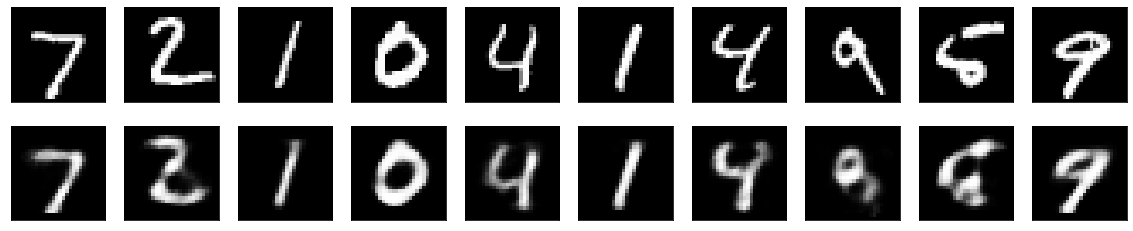

In [51]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autocoder_out[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

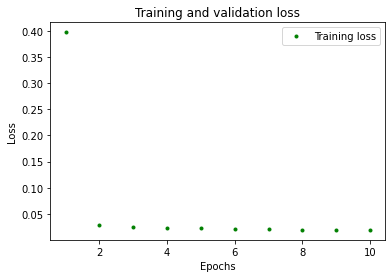

In [52]:
plt.clf()
# the predicted and actual values during training and validation.
loss = history_1.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
error = np.sum(np.abs(x_test-autocoder_out),axis=1)

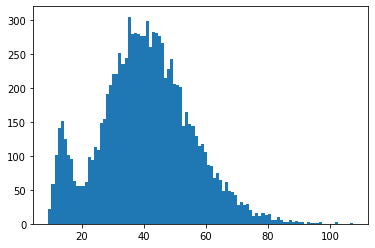

In [54]:
t=plt.hist(error, bins=100)

In [61]:
outliers = x_test[error>80]

In [64]:
outliers_pred = autocoder_out[error>80]

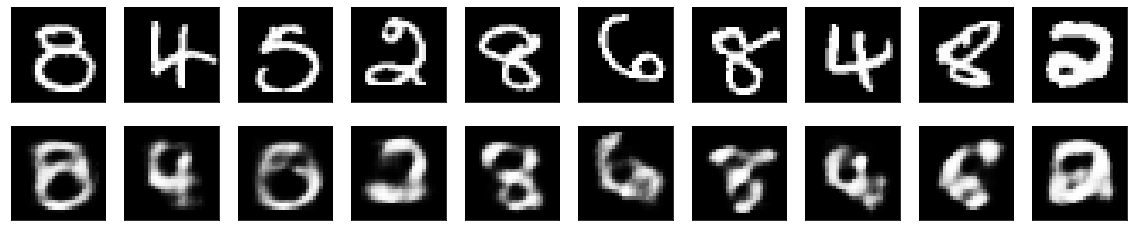

In [66]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(outliers[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outliers_pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()